## Lending Club Case Study

### Data understanding

#### Problem Statement:

A finance service company called the Lending Club offers customers to lend various types of loans. Some of the types of loans are business loans, personal loans, educational loans, home loans etc. 

When an applicant applies for a loan, the company has to take a decision for a loan approval based on the applicant’s information. 

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

#### Business Objective:

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

#### Assumption

The dataset consists of data dictionary and loans details issued from 2007 to 2011 by the Lending Club. 

Since the company wants to understand the driving factor behind a defaults, only those variables will be considered for the analysis. These variables will be helpful in helping the investor to take a decision on whether or not to invest in the loan request. Customer behaviour information provided in the dataset will not be considered

Importing the required libraries for the analysis.

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [239]:
lc_df = pd.read_csv('loan.csv')

In [240]:
lc_df.shape

(39717, 111)

In [241]:
lc_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

### Data Cleaning and Manipulation

Let's clean the dataset provided by first removing columns with the most missing values or NA. The threshold we would consider would be 80%

In [242]:
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [243]:
# calculating the percentage of the missing value and checking for those specific columns
null_columns = round(lc_df.isnull().sum()/lc_df.shape[0] * 100)
missing_val_col = null_columns[null_columns > 80]
missing_val_col

mths_since_last_record             93.0
next_pymnt_d                       97.0
mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0


In [244]:
missing_val_col = list(missing_val_col.index)

In [245]:
# Dropping the columns mentioned in missing_val_col
lc_df.drop(missing_val_col, axis = 1,inplace = True)

In [246]:
lc_df.shape

(39717, 55)

#### Conclusion: Custom behaviour variables should be dropped as well, since they don't add any value to our investigation.

["delinq_2yrs",
"earliest_cr_line",
"inq_last_6mths",
"open_acc", 
"pub_rec",
"revol_bal",
"revol_util",
"total_acc",
"out_prncp",
"out_prncp_inv",
"total_pymnt",
"total_pymnt_inv",
"total_rec_prncp",
"total_rec_int",
"total_rec_late_fee",
"recoveries",
"collection_recovery_fee",
"last_pymnt_d",
"last_pymnt_amnt",
"last_credit_pull_d",
"application_type"]

In [247]:
# Dropping the columns considered as customer behaviour variables
lc_df_columns = ["delinq_2yrs",
"earliest_cr_line",
"inq_last_6mths",
"open_acc", 
"pub_rec",
"revol_bal",
"revol_util",
"total_acc",
"out_prncp",
"out_prncp_inv",
"total_pymnt",
"total_pymnt_inv",
"total_rec_prncp",
"total_rec_int",
"total_rec_late_fee",
"recoveries",
"collection_recovery_fee",
"last_pymnt_d",
"last_pymnt_amnt",
"last_credit_pull_d",
"application_type",
"url",
"zip_code",
"addr_state",
"desc",
"title"]
lc_df.drop(lc_df_columns, axis = 1, inplace = True)
lc_df.shape

(39717, 29)

1. url : URL for LC page with each memberid, hence it does not contribute for analysis.
2. addr_state : addr_state,zip_code does not contribute to analysis since its member portfolio information.
3. desc : Loan description provided by the borrower, therefore it won't be helpful in the analysis.
4. title : is a loan title provided by the borrower, therefore it won't be helpful in the analysis.
5. member_id : id provided to the loan, hence it does not contribute for analysis.
6. id: unique id provided to the member, hence it does not contribute for analysis
7. initial_list_status: is a initial listing status of the loan.The only value found in the dataset is F.Therefore it won't be helpful in the analysis.
8. collections_12_mths_ex_med: is number of collections made in 12 months excluding medical collections. The only value found in the dataset is 0.Therefore it won't be helpful in the analysis.
9. policy_code: is a column of the policy code for the loan. The value in the dataset is 1, which means all are publicly available, hence nothing to contribute for analysis
10. acc_now_delinq: is a no of account in which borrowers are delinquent. The values present in the entire dataset is 0, hence it won't contribute for analysis.
11. chargeoff_within_12_mths: no. of charge off within 12 months. The values present in the entire dataset is 0, hence it won't contribute for analysis.
12. delinq_amnt: is a past due amount owed to the lender. The values present in the entire dataset is 0, hence it won't contribute for analysis.
13. tax_liens: is a no. of tax liens. The values present in the entire dataset is 0, hence it won't contribute for analysis.
14. mths_since_last_delinq: DOUBT in this!!!!!!!!!
15. pub_rec_bankruptcies: is a no. of bankcruptcies declared by the borrowers. Since the customer can file bankruptcy insurance against it it won't affect the financial stature of the borrower. Hence it won't contribute for analysis.

In [248]:
lc_df_columns = ["id",
"member_id",
"initial_list_status",
"collections_12_mths_ex_med", 
"policy_code",
"acc_now_delinq",
"chargeoff_within_12_mths",
"delinq_amnt",
"tax_liens",
"mths_since_last_delinq",
"pub_rec_bankruptcies"
]
lc_df.drop(lc_df_columns, axis = 1, inplace = True)
lc_df.shape

(39717, 18)

#### Since the applicant is in the process of paying the installments and the tenure of the loan has not yet been completed. These candidates are not labelled as 'defaulted'. Hence wont be consired for the analysis.

In [249]:
lc_df = lc_df[lc_df["loan_status"] != "Current"]

In [251]:
lc_df.shape

(38577, 19)

In [252]:
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  pymnt_plan         

 #### Variables considered in the data analysis
 
 1.   loan_amnt            is the loan amount requested by the borrower.  
 2.   funded_amnt          is the total amount committed to the loan at that point in time.
 3.   funded_amnt_inv      is total amount committed by investors for that loan at that point in time.
 4.   term                 The number of payments on the loan. Values are in months and can be either 36 or 60.
 5.   int_rate             Interest Rate on the loan
 6.   installment          The monthly payment owed by the borrower if the loan originates.
 7.   grade                LC assigned loan grade
 8.   sub_grade            LC assigned loan subgrade
 9.   emp_title            The job title supplied by the Borrower when applying for the loan.
 10.  emp_length           Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
 11.  home_ownership        The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
 12.  annual_inc            The self-reported annual income provided by the borrower during registration.
 13.  verification_status   Indicates if income was verified by LC, not verified, or if the income source was verified 
 14.  issue_d               The month which the loan was funded
 15.  loan_status           Current status of the loan. Possible values are Fully Paid, Charged Off and Current
 16.  pymnt_plan            Indicates if a payment plan has been put in place for the loan
 17.  purpose               A category provided by the borrower for the loan request.
 18.  dti                   A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [253]:
lc_df["emp_length"].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [254]:
# Since emp_length have nan values removing those rows
lc_df = lc_df[~lc_df.emp_length.isnull()]

In [255]:
# Correcting format of Interest rate Column and Changing type 
lc_df['int_rate'] = lc_df.int_rate.str.strip('%').astype(float)

In [256]:
lc_df.shape

(37544, 19)

In [257]:
lc_df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

#### Added two columns derived from issue date of the loan into issue_d_month and issue_d_year

In [259]:
lc_df["issue_d"] = pd.to_datetime(lc_df["issue_d"], format='%b-%y')
lc_df['issue_d_month'] = pd.to_datetime(lc_df['issue_d']).dt.month
lc_df['issue_d_year'] = pd.to_datetime(lc_df['issue_d']).dt.year

In [260]:
# Checking for null values in the final dataset considered for the analysis
lc_df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               1408
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
dti                        0
loan_status_category       0
issue_d_month              0
issue_d_year               0
dtype: int64

In [261]:
lc_df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [262]:
# Picking only the numeric value which is 36 and 60 in order to plot a better graph
lc_df['term'] = lc_df.term.apply(lambda x: x.split()[0])
lc_df['term']

0        36
1        60
2        36
3        36
5        36
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 37544, dtype: object

In [263]:
lc_df["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [264]:
lc_df["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [265]:
lc_df["emp_length"].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [266]:
lc_df["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [267]:
lc_df["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [268]:
lc_df["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

## Data Analysis

List of categorical variables which can be investigated based on their unique unordered values

1. loan_status
2. term
3. grade
4. sub_grade
5. emp_title
6. emp_length
7. home_ownership
8. verification_status
9. purpose

In [269]:
# Create two different dataset categorised by loan_status e.i Fully Paid and Charged Off
lc_fully_paid = lc_df[lc_df['loan_status'] == "Fully Paid"]
lc_charged_off = lc_df[lc_df['loan_status'] == "Charged Off"]

In [270]:
# Added function to show label for different charts
def showBarLabel(ax, formatType):
    if formatType == '%':
        ax.bar_label(container = ax.containers[0], fontsize=15, fmt='%.0f%%')
    else:
        ax.bar_label(container = ax.containers[0], fontsize=10)

In [271]:
def percentOfLoanStatus(df, compareTo, loanstatus, title):
    plt.figure(figsize=(20,8))
    total_loan_status = df.groupby(['loan_status',compareTo])[compareTo].count()
    compareTo_count = df.groupby(compareTo)[compareTo].count()
    percentages = (total_loan_status/compareTo_count)*100
    ax = percentages.loc[loanstatus].plot.bar(color = sns.color_palette("husl"))
    ax.set_ylabel('% of ' + loanstatus)
    plt.title(title, fontsize="20")
    showBarLabel(ax, '%')
    return ax

## Univariate analysis

   ### Loan Status


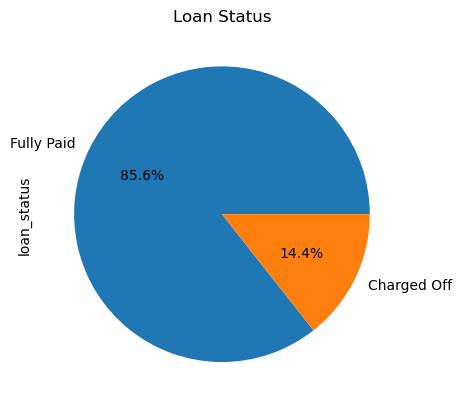

In [272]:
lc_df['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Loan Status')
plt.show()

Observation : Maximum loans are fully paid

### Ordered Categorical Variables

### Term

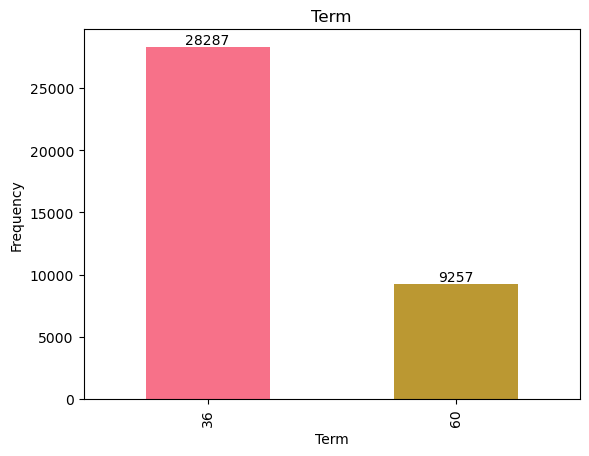

In [273]:
ax = lc_df.term.value_counts().plot(kind='bar' ,color = sns.color_palette("husl"))
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.title('Term')
showBarLabel(ax,"")
plt.show()

Observation: Borrowers have taken 36 months tenure loan more than 60 months.

### Grade

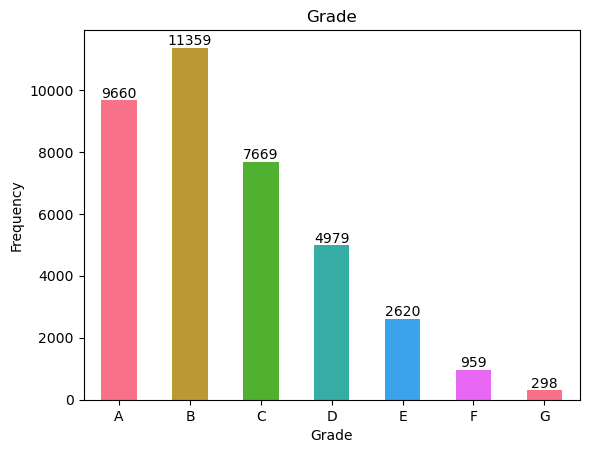

In [274]:
ax = lc_df.grade.value_counts().sort_index().plot(kind='bar' , color = sns.color_palette("husl"))
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Grade')
showBarLabel(ax,"")
plt.xticks(rotation=0)
plt.show()

Observation: Most Borrowers comes under A and B grade.

# Sub Grade



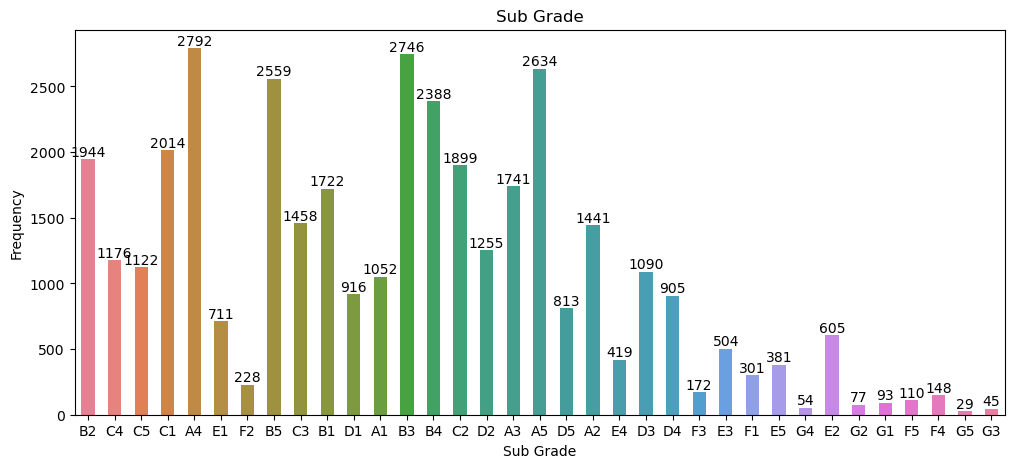

In [275]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x = 'sub_grade' , data = lc_df, width= 0.5, palette="husl")
plt.xlabel('Sub Grade')
plt.ylabel('Frequency')
showBarLabel(ax,"")
plt.title('Sub Grade')
plt.show()

Observation: Most borrowers have been categorised under A4,B4 and A5

## Interest Rate

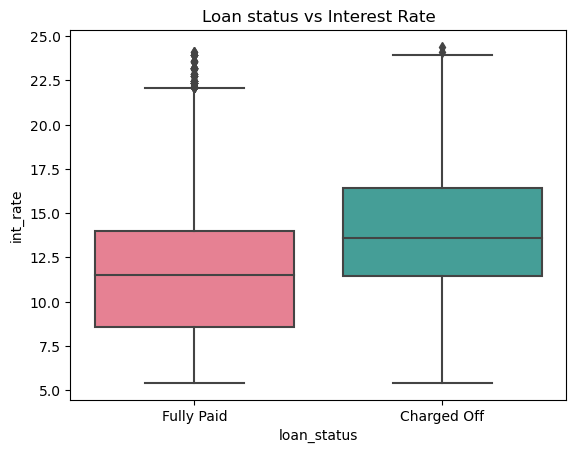

In [276]:
sns.boxplot(x='loan_status', y=lc_df.int_rate, data = lc_df, palette="husl")
plt.title('Loan status vs Interest Rate')
plt.show()

Observation : Interest Rate is higher for Charged off customer.

## Employee Length

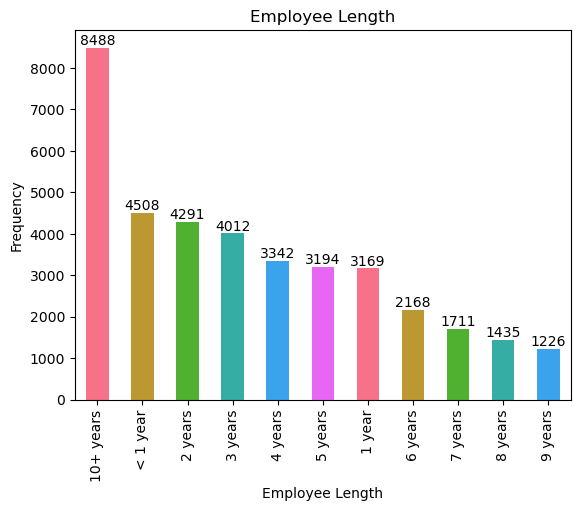

In [277]:
ax = lc_df.emp_length.value_counts().plot(kind='bar', color = sns.color_palette("husl"))
plt.xlabel('Employee Length')
plt.ylabel('Frequency')
plt.title('Employee Length')
showBarLabel(ax,"")
plt.xticks(rotation=90)
plt.show()

Observation : Most Borrowers have mostly 10+ years employement length

### Unordered Categorical Variables

###  Home Ownership

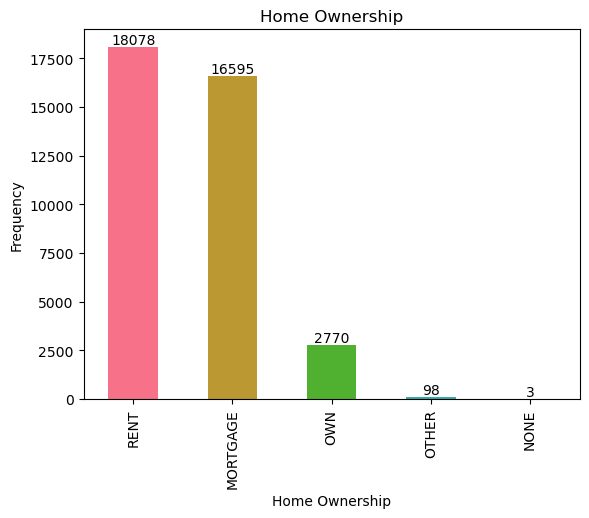

In [278]:
ax = lc_df.home_ownership.value_counts().plot(kind='bar', color = sns.color_palette("husl"))
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
showBarLabel(ax,"")
plt.title('Home Ownership')
plt.show()

Observation : Maximum loan taken are on Rental

### Verification Status

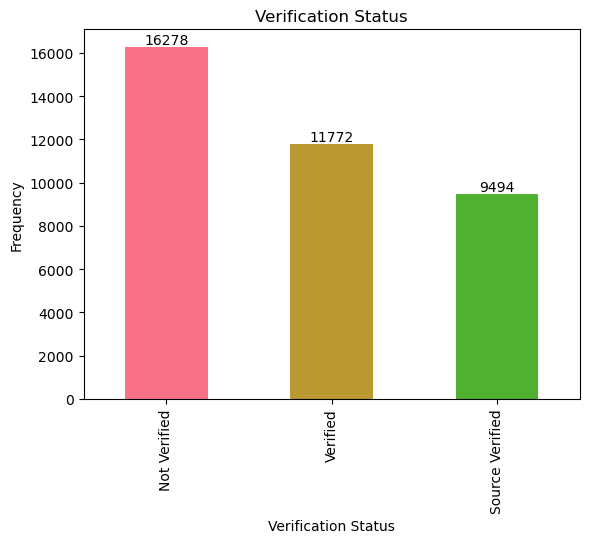

In [279]:
ax = lc_df.verification_status.value_counts().plot(kind = 'bar', color = sns.color_palette("husl"))
plt.xlabel('Verification Status')
plt.ylabel('Frequency')
showBarLabel(ax,"")
plt.title('Verification Status')
plt.show()

Observation : Most Borrowers are 'Not Verified'. 

### Purpose

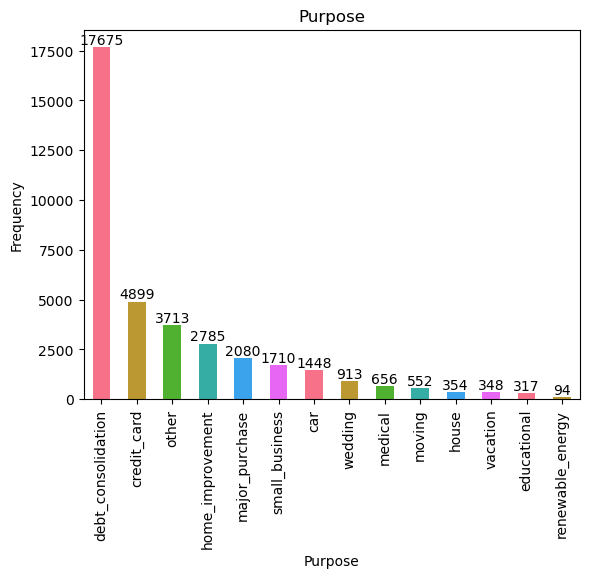

In [280]:
ax = lc_df.purpose.value_counts().plot(kind = 'bar', color = sns.color_palette("husl"))
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title('Purpose')
showBarLabel(ax,"")
plt.xticks(rotation=90)
plt.show()

Observation : Most of borrowers have taken loan for Debt Consolidation.

## Quantitative Variables

### Loan Amount

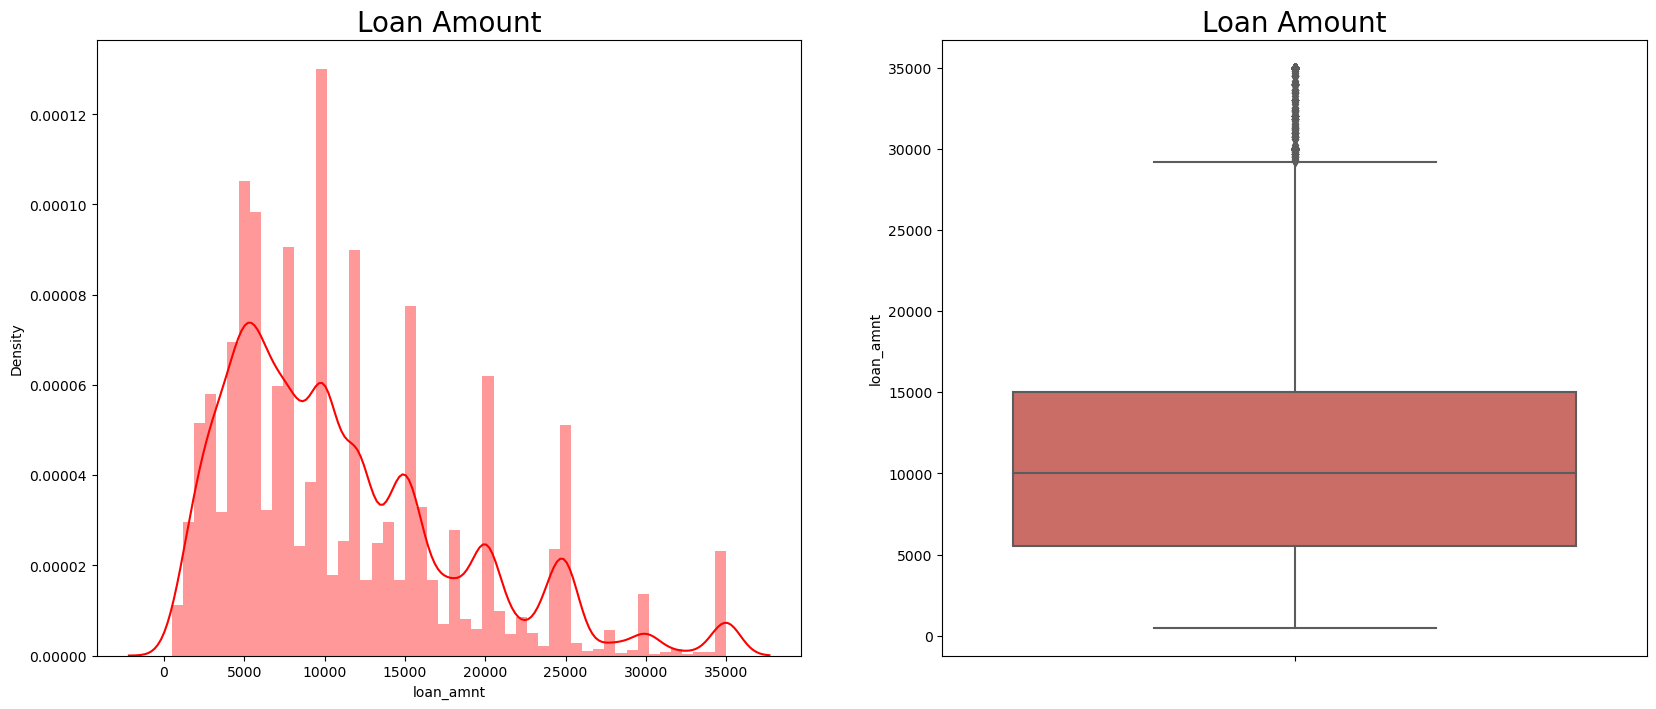

In [281]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.distplot(lc_df.loan_amnt, color='r')
plt.title('Loan Amount',fontsize="20")
plt.subplot(122)
sns.boxplot(y=lc_df.loan_amnt, palette="hls")
plt.title('Loan Amount',fontsize="20")
plt.show()

Observation : Maximum number of borrower have taken 10000 as loan amount.

## Segmented Univariate Analayis

### Loan Amount

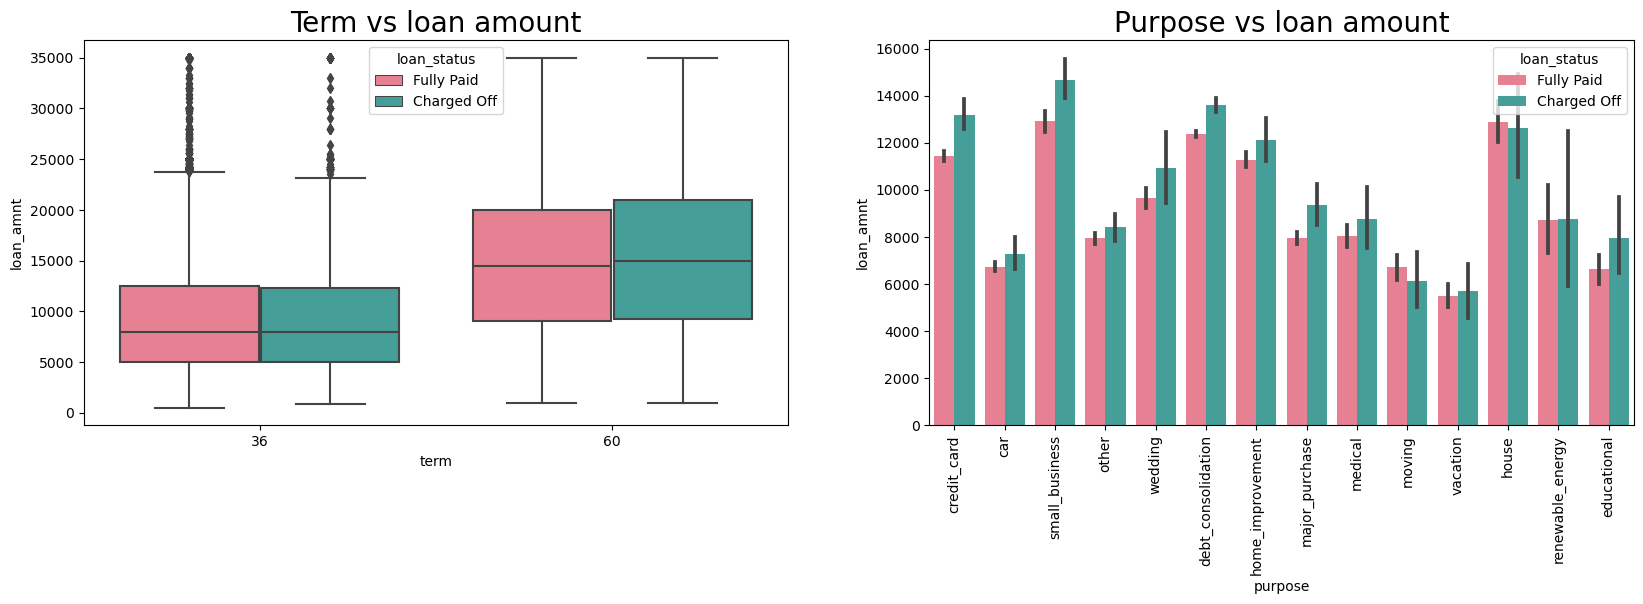

In [282]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=lc_df, palette = "husl")
plt.title('Term vs loan amount',fontsize="20")
plt.subplot(122)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data=lc_df, palette = "husl")
plt.xticks(rotation=90)
plt.title('Purpose vs loan amount',fontsize="20")
plt.show()

Observations:
Higher amount loans have high tenure i.e, 60 months and higher duration loans have more charged off borrowers when 
compared to shorter duration.
Small Business have higher chances of charged off and house loan have maximum number of Fully paid borrowers


### Home Ownership vs Loan amount , Verification Status vs Loan Amount 

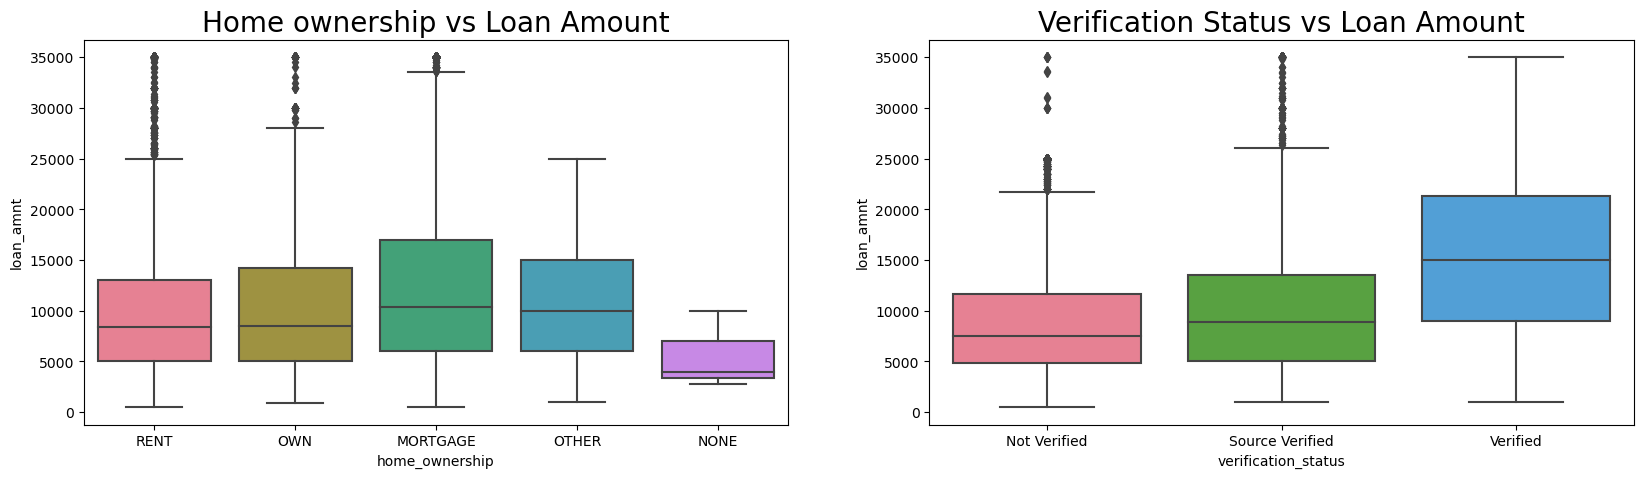

In [283]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=lc_df.loan_amnt, data=lc_df, palette = "husl")
plt.title('Home ownership vs Loan Amount',fontsize="20")
plt.subplot(122)
plt.title('Verification Status vs Loan Amount',fontsize="20")
verification_status_ord = lc_df.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=lc_df.loan_amnt, order = verification_status_ord, data=lc_df, palette = "husl")
plt.show()

Observation : Most of the borrowers have MORTGAGE and also the median loan amount (10000 and above) high for MORTGAGE owned borrowers.
And also we see that most of borrowers are Verified for borrowing loan above 9000

### Purpose Vs Loan Amount

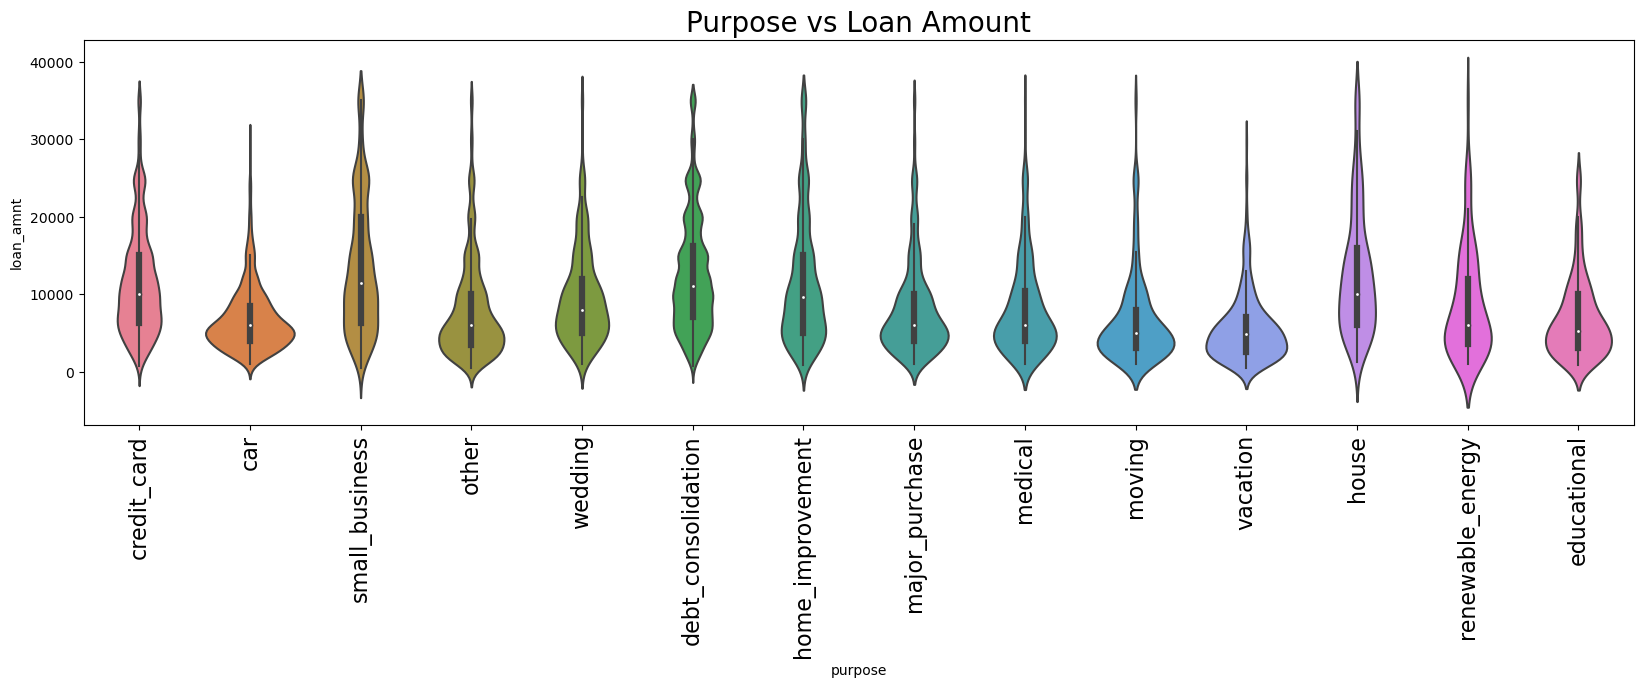

In [284]:
plt.figure(figsize=(20,5))
sns.violinplot(data=lc_df,x='purpose',y=lc_df.loan_amnt, palette = "husl")
plt.xticks(rotation=90,fontsize="16")
plt.title('Purpose vs Loan Amount',fontsize="20")
plt.show()

Observation : Most of borrowers have Small business or under Debt consolidation.

### Term Vs Interest Rate, Grade Vs Interest Rate

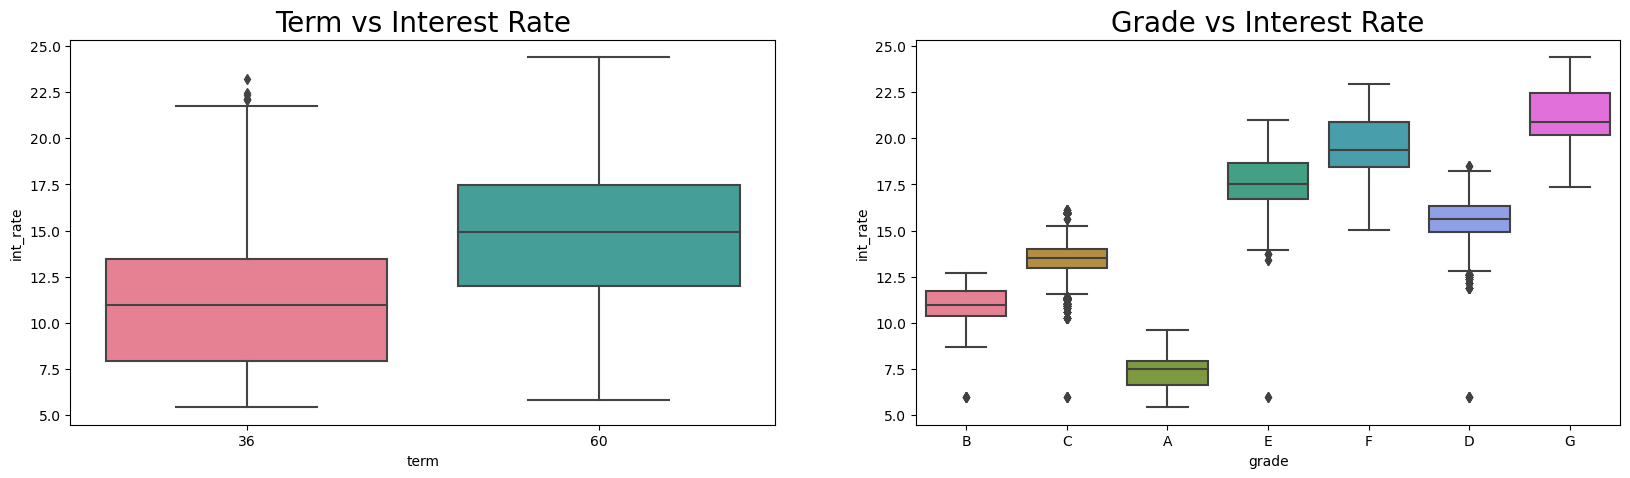

In [285]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=lc_df.int_rate, data=lc_df,palette = "husl")
plt.title('Term vs Interest Rate',fontsize="20")
plt.subplot(122)
plt.title('Grade vs Interest Rate',fontsize="20")
sns.boxplot(x='grade', y=lc_df.int_rate, data=lc_df,palette = "husl")
plt.show()

Observation: The interest rates are higher for Higher tenure loans. 
Also Interest Rates increases with grades in the alphabetical order minimum being A and maximum being G.

### Purpose vs Interest Rate 

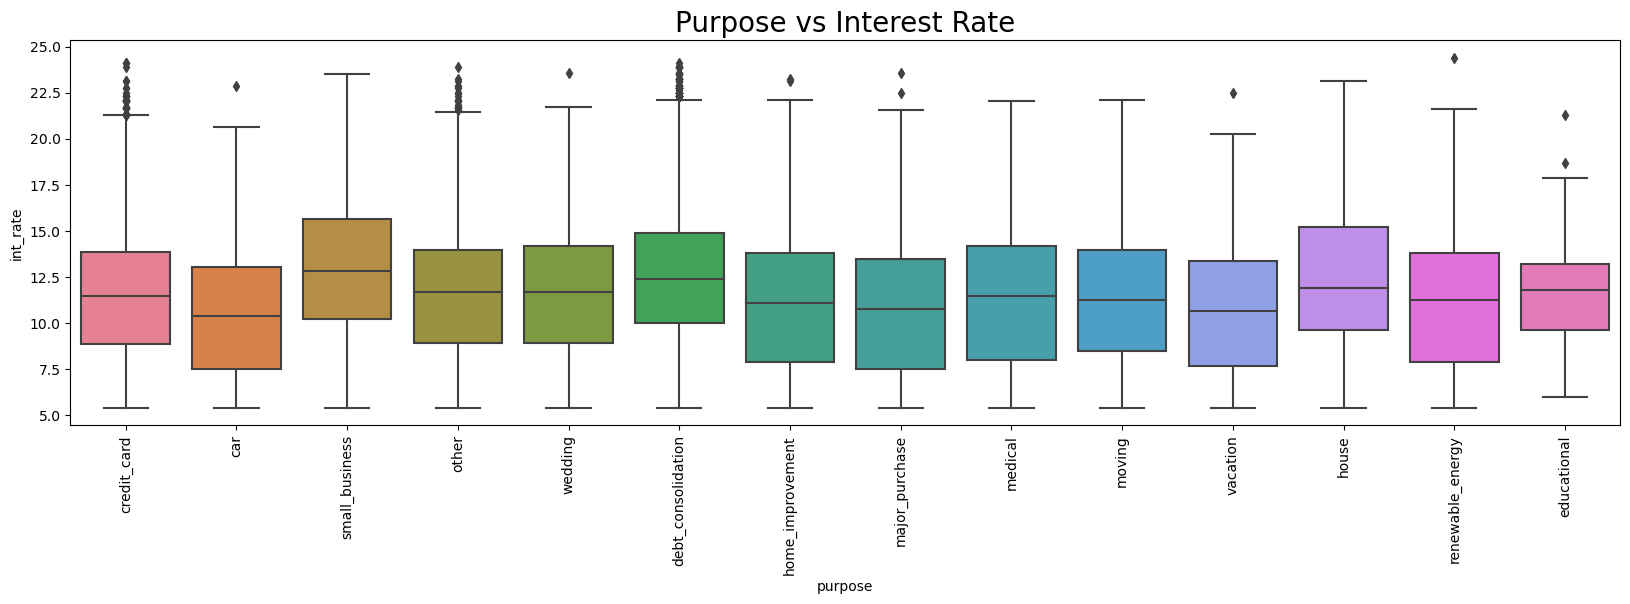

In [286]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=lc_df.int_rate, data=lc_df, palette = "husl")
plt.xticks(rotation=90)
plt.title('Purpose vs Interest Rate',fontsize="20")
plt.show()

Observation : Interest Rate is higher for Small Business, Debt Consolidation and House loans.

### DTI (Debt to Income Ratio) vs Terms, DTI VS Grade
 

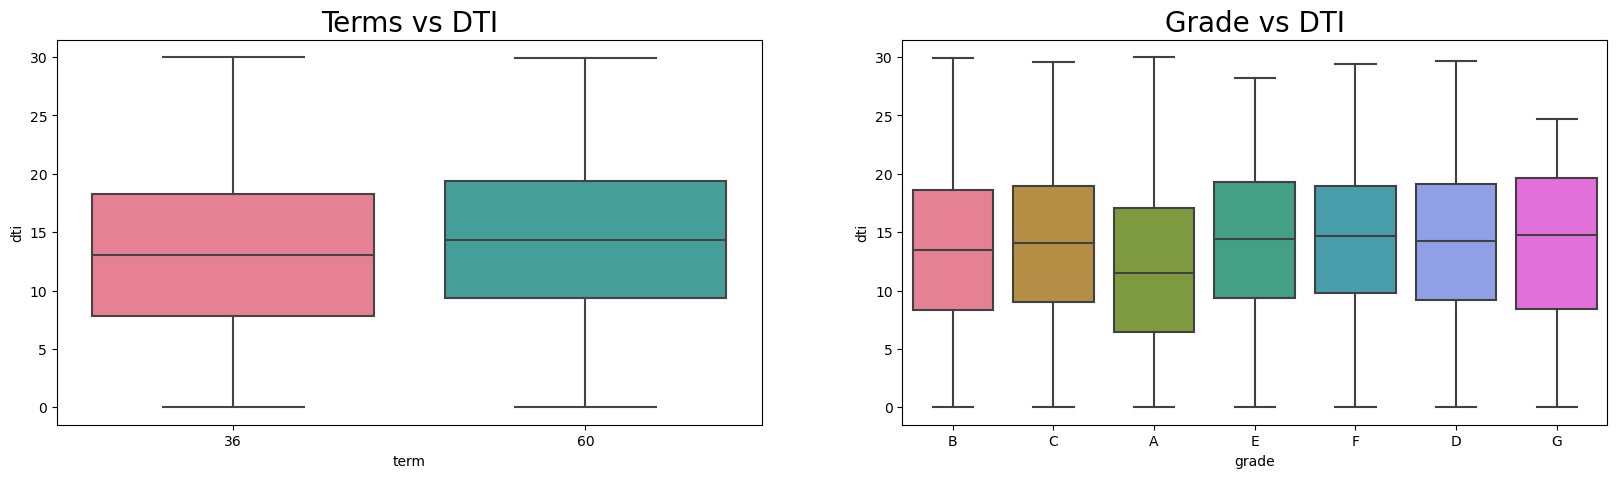

In [287]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=lc_df.dti, data=lc_df, palette = "husl")
plt.title('Terms vs DTI',fontsize="20")
plt.subplot(122)
plt.title('Grade vs DTI',fontsize="20")
sns.boxplot(x='grade', y=lc_df.dti, data=lc_df, palette = "husl")
plt.show()

Observation: DTI ratio is bit high for people with maximum tenure i.e., 60 months. A grade borrowers have low DTI ratio when compared to other grades. 

DTI ratio should be low for having high repayment percentage.

### Grade vs Loan Amount 

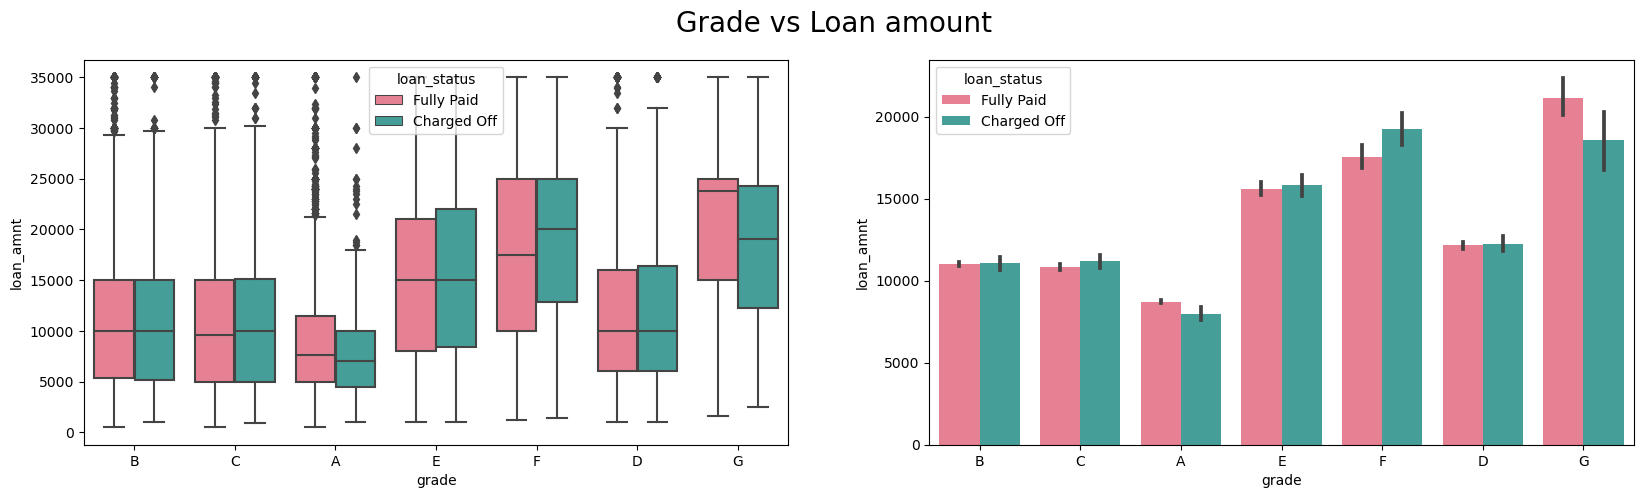

In [318]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=lc_df, palette = "husl")
plt.subplot(122)
ax = sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=lc_df, palette = "husl")
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.1f')
plt.suptitle('Grade vs Loan amount',fontsize="20")
plt.show()

Observations: For lower grades 'F' and 'G' there are more difference between charged-off and fully paid. The lower grade people has taken higher amount of loans and also they are more prone to default the loan.

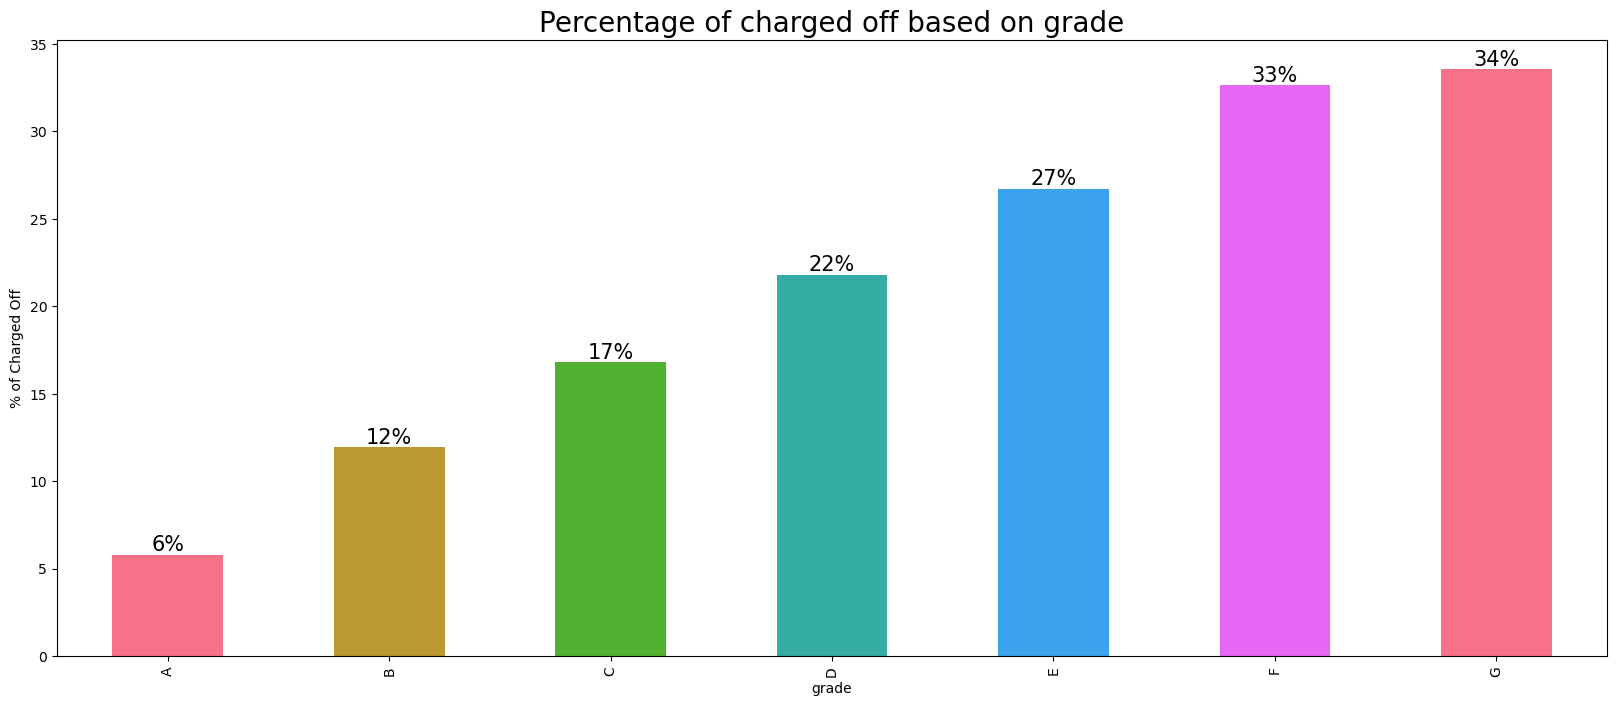

In [289]:
# Check the percentage of charged off applicants compared to total loan with their respective grade
percentOfLoanStatus(lc_df,'grade','Charged Off', title="Percentage of charged off based on grade");

Observation: 34% of Charged off borrowers come under the grade G and 34% under F grade.

### Grade vs Loan Status

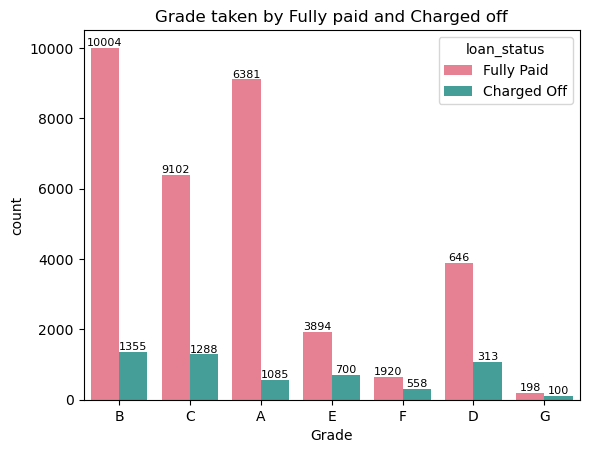

In [290]:
g1 = sns.countplot(x="grade",data=lc_df, 
              palette="husl", 
              hue = "loan_status")
label_values = lc_fully_paid['grade'].value_counts()
g1.bar_label(container = g1.containers[0], labels=label_values, fontsize=8)

label_values1 = lc_charged_off['grade'].value_counts()
g1.bar_label(container = g1.containers[1], labels=label_values1, fontsize=8)

g1.set_title("Grade taken by Fully paid and Charged off")
g1.set_xlabel("Grade")
plt.show()

Observation : B has highest number of loans which are Fully paid. 

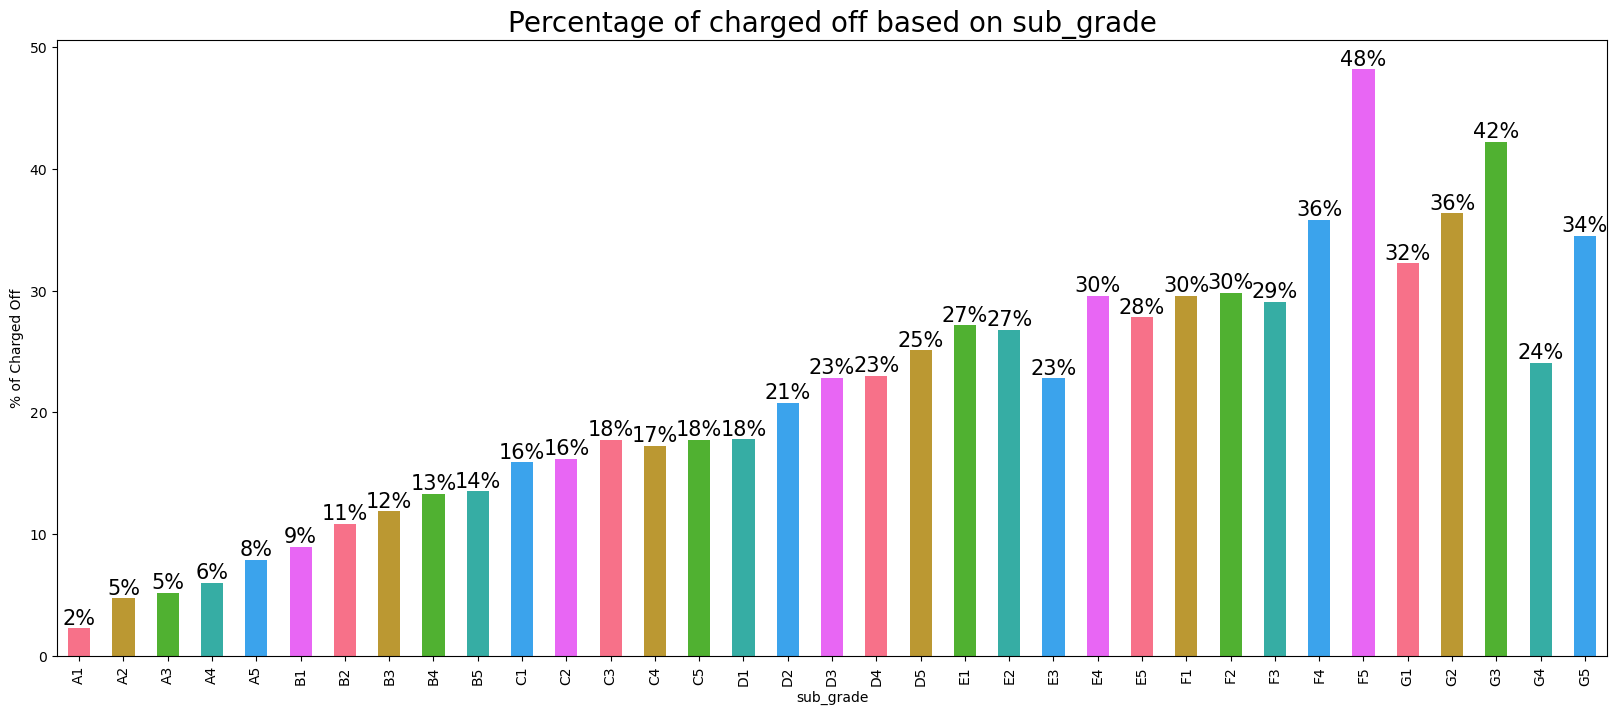

In [319]:
# Check the percentage of charged off applicants compared to total loan with their respective subgrade grade
percentOfLoanStatus(lc_df,'sub_grade','Charged Off',title="Percentage of charged off based on sub_grade");

Observation: F5 and G3 subgrades have highest percentage of Charged off borrowers.

### Employee Length vs Loan Status

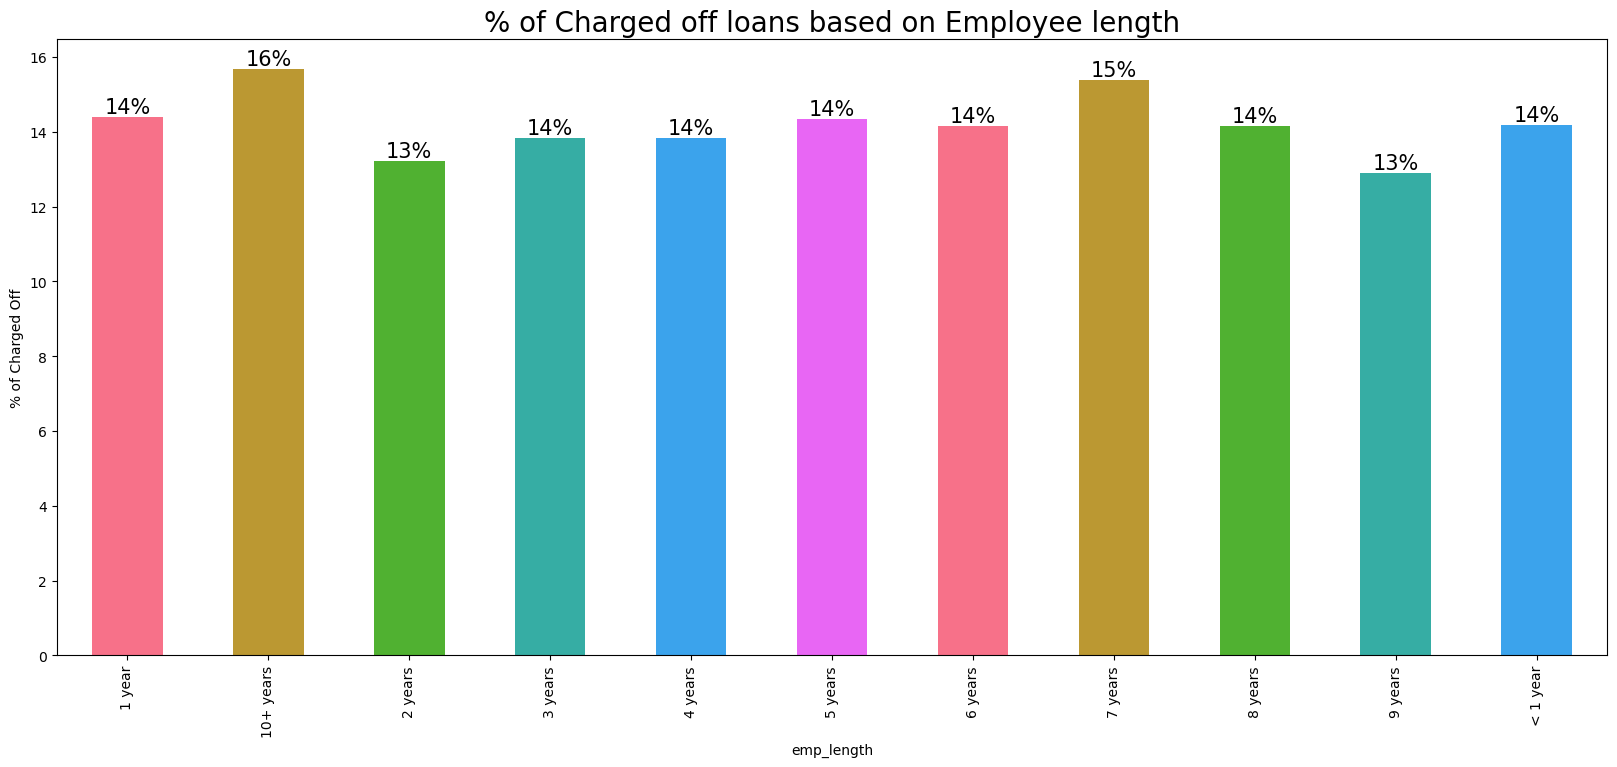

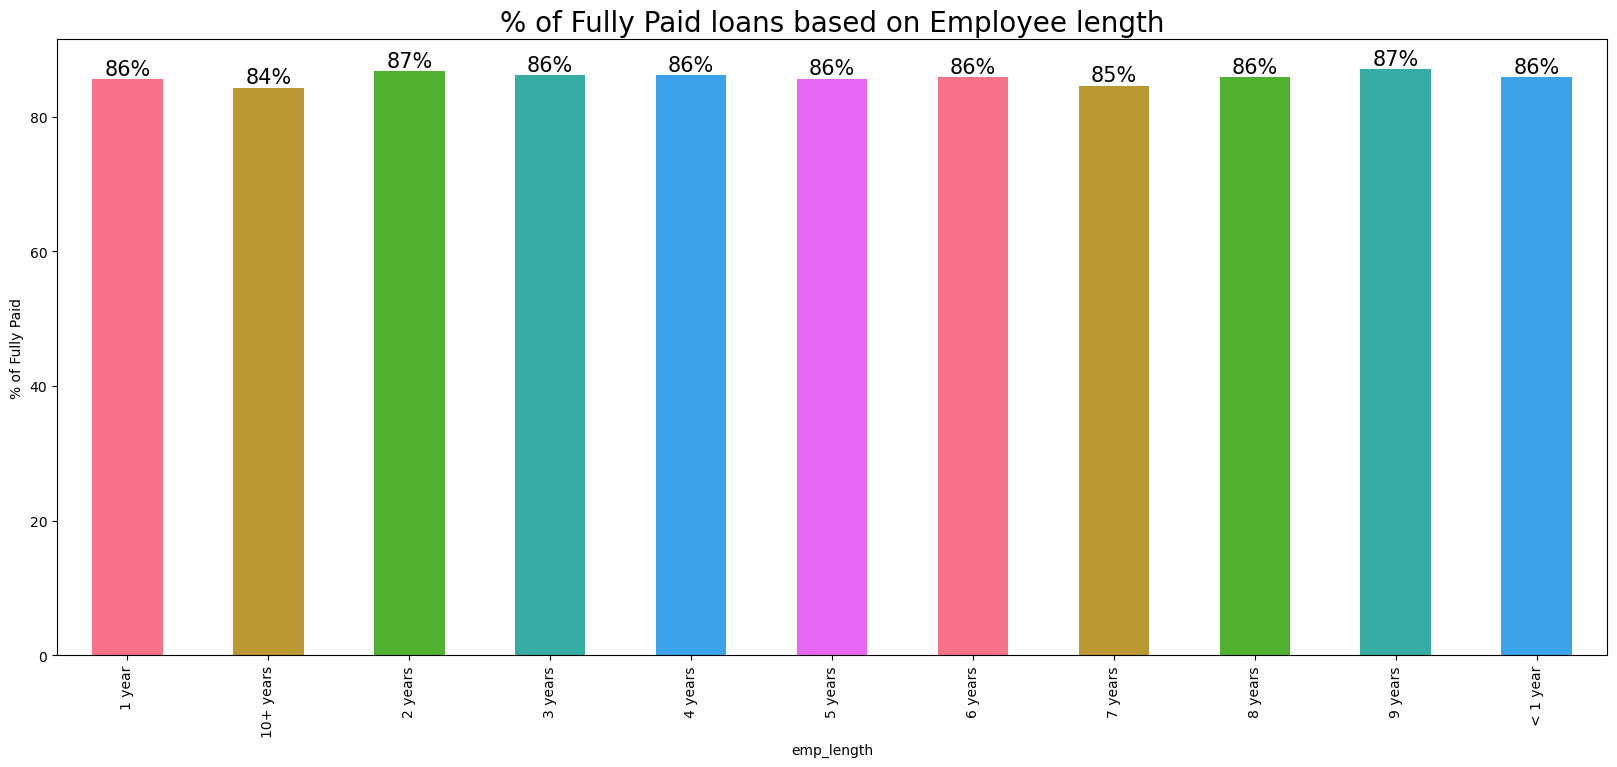

In [320]:
# Check the percentage of charged off applicants compared to total loan with their respective subgrade grade
percentOfLoanStatus(lc_df,'emp_length','Charged Off',title="% of Charged off loans based on Employee length");
percentOfLoanStatus(lc_df,'emp_length','Fully Paid',title="% of Fully Paid loans based on Employee length");

Observation: The 16% of charged off borrowers have 10 years of employee length.
The 87% of fully paid borrowers also have 2 and 9 years of employee length.

In [321]:
fig = px.box(lc_df, x="loan_status", y="loan_amnt",title="Loan amount vs Loan status")
fig.show()

Observation: 75 percentile of Fully paid borrowers have taken loan amount of 15K and below whereas 75 percentile Charged off borrowers have taken 17k and below.

In [86]:
lc_df.groupby('loan_status')['loan_amnt'].describe()

count          mean          std    min     25%      50%  \
loan_status                                                               
Charged Off   5399.0  12244.077607  8086.515636  900.0  6000.0  10000.0   
Fully Paid   32145.0  10930.419972  7206.743260  500.0  5400.0   9600.0   

                 75%      max  
loan_status                    
Charged Off  17000.0  35000.0  
Fully Paid   15000.0  35000.0

## Bivariate Analysis

### Loan Amount vs Interest Rate

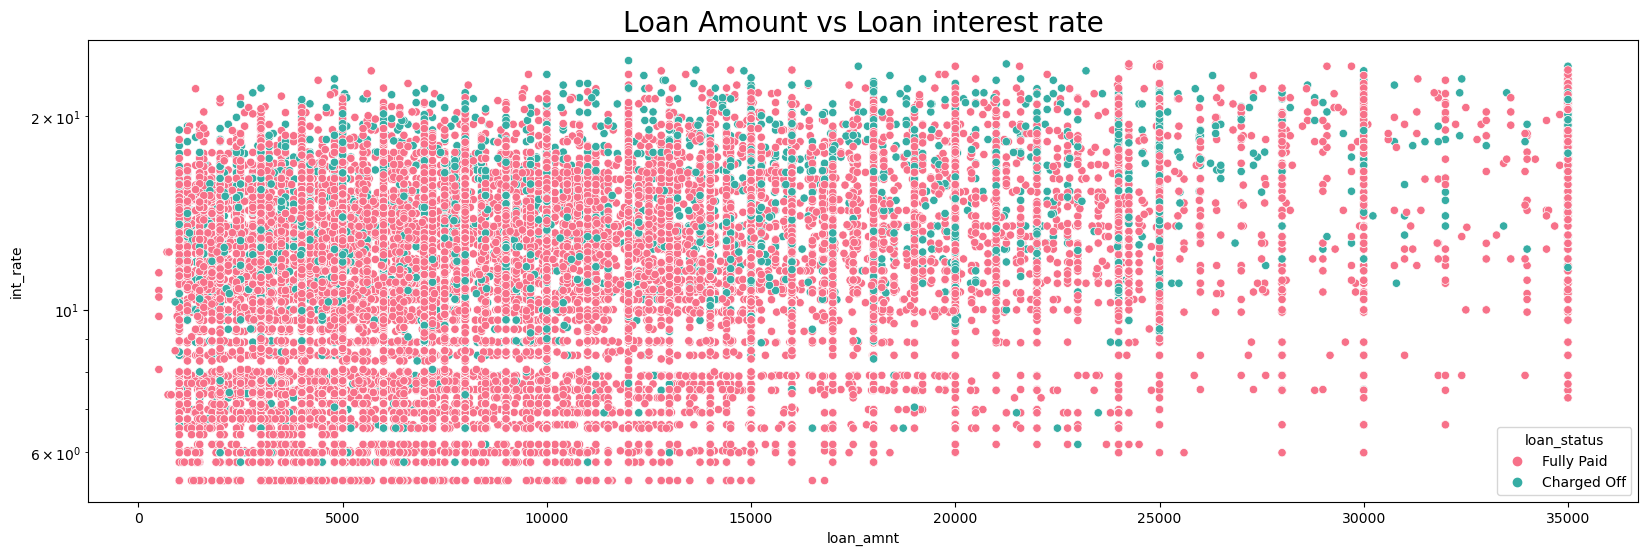

In [90]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='int_rate', data=lc_df, hue='loan_status',palette = "husl")
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate',fontsize="20")
plt.show()

Observation : Values are spread widely. So no clear pattern is observed.

### Loan Amount vs Annual income

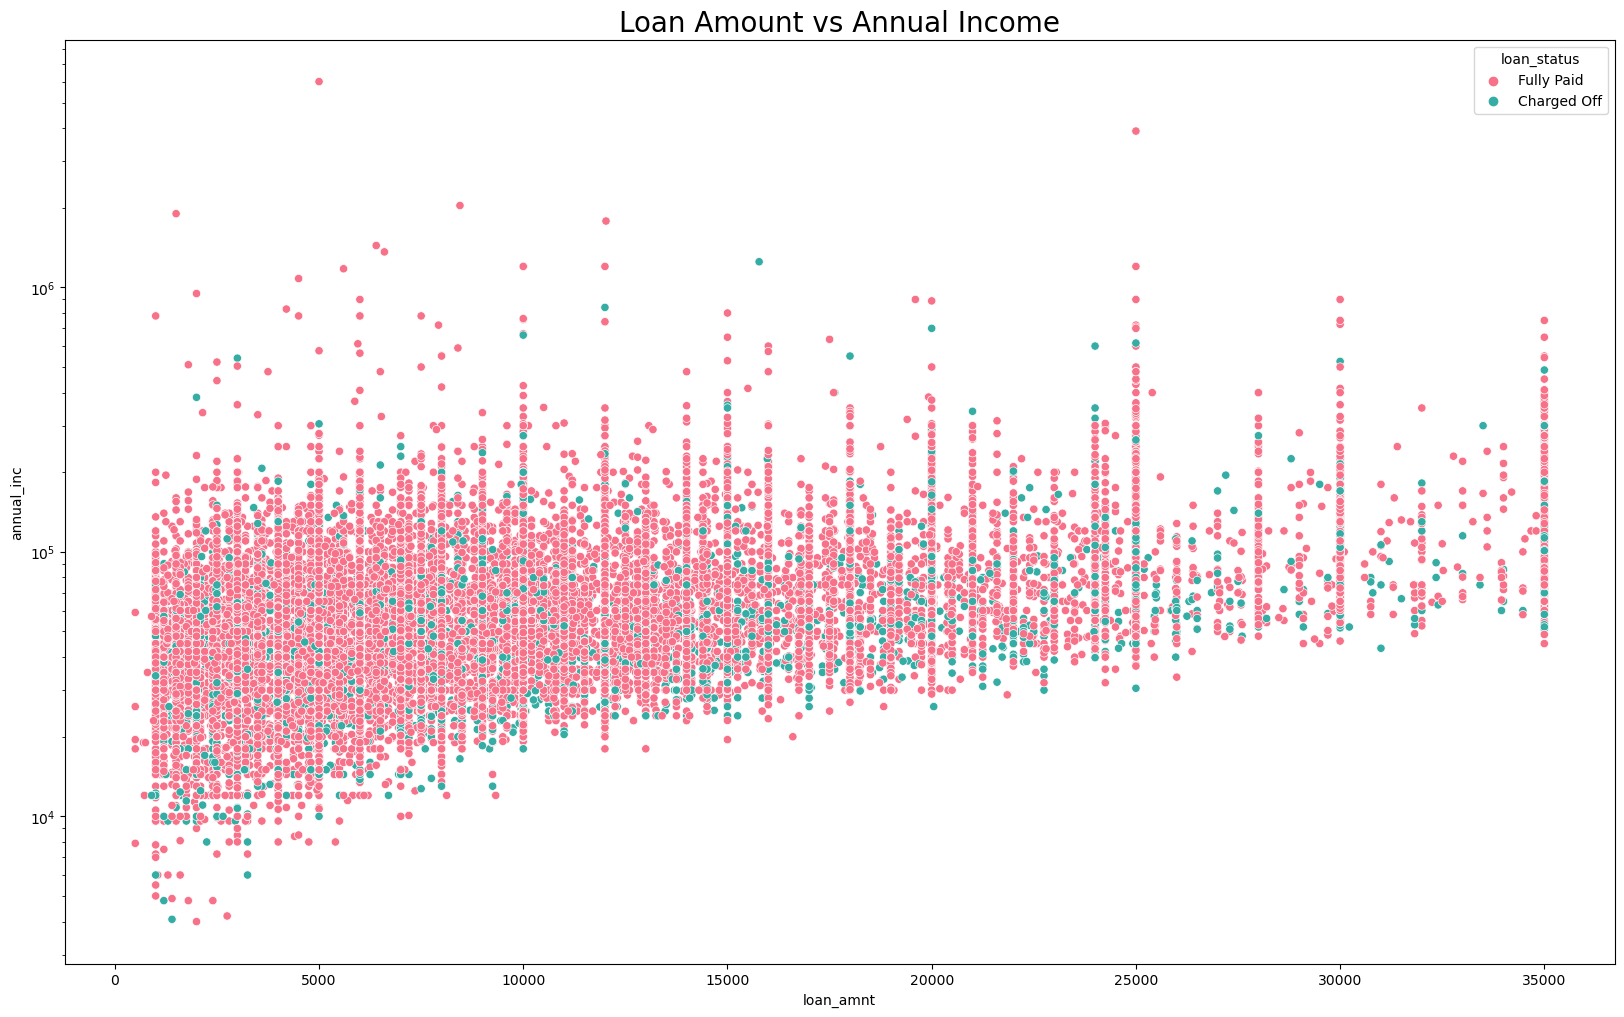

In [96]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='loan_amnt', y='annual_inc', data=lc_df , hue = 'loan_status',palette = "husl")
plt.yscale('log')
plt.title('Loan Amount vs Annual Income',fontsize="20")
plt.show()

Observation : We can see slight increase of loan amount with increase of annual income.

### Loan Amount vs DTI

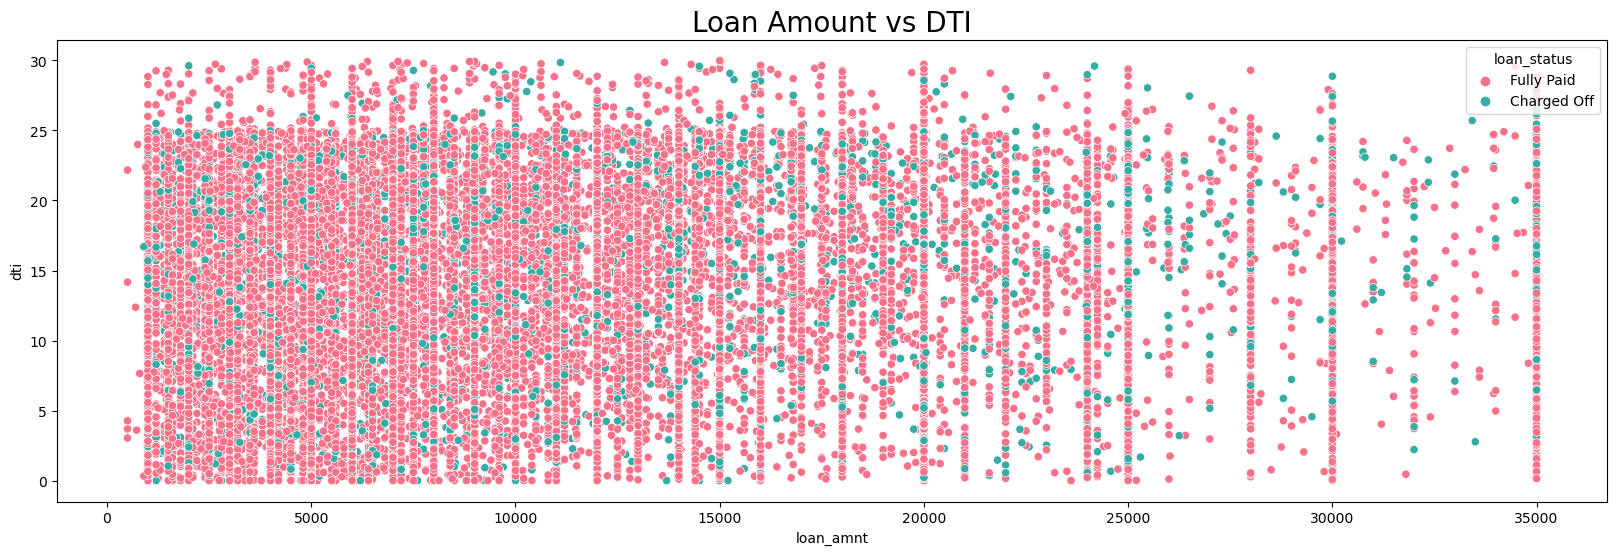

In [109]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='loan_amnt', y='dti', data=lc_df, hue='loan_status', palette = "husl")
plt.title('Loan Amount vs DTI',fontsize="20")
plt.show()

Observation : Data is very scattered and no pattern was found. This concludes that there is no correlation between loan_amount and DTI

### Interest Rate vs DTI

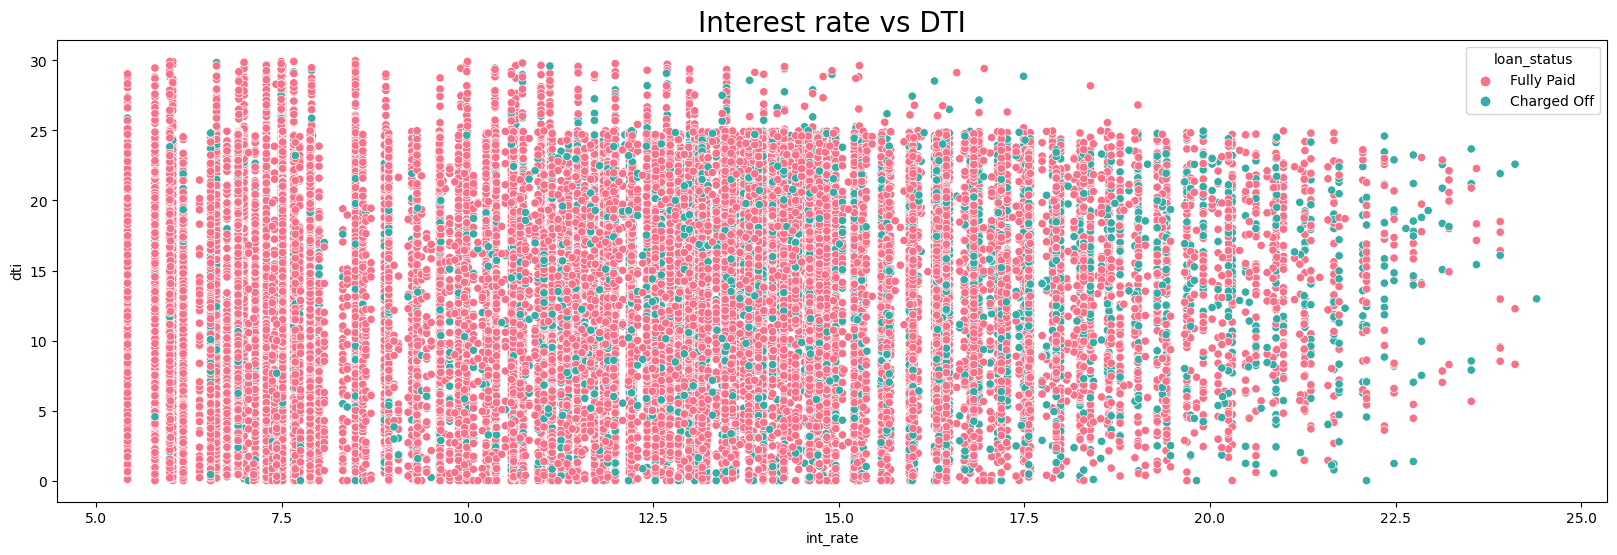

In [110]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=lc_df, hue='loan_status', palette = "husl")
plt.title('Interest rate vs DTI',fontsize="20")
plt.show()

Observations : Values are spread all accross, but we notice that irrespective of DTI, with the increase of interest rates, Charged off loans increase as well.

## Derived Variable

In [105]:
# To check ratio of loan amount reduced by the investors new derived variable ratio_loan_funded was created
lc_df["ratio_loan_funded"] = lc_df["funded_amnt_inv"] *100/lc_df["loan_amnt"]
lc_df

loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  installment  \
0           5000         5000           4975.0   36     10.65       162.87   
1           2500         2500           2500.0   60     15.27        59.83   
2           2400         2400           2400.0   36     15.96        84.33   
3          10000        10000          10000.0   36     13.49       339.31   
5           5000         5000           5000.0   36      7.90       156.46   
...          ...          ...              ...  ...       ...          ...   
39712       2500         2500           1075.0   36      8.07        78.42   
39713       8500         8500            875.0   36     10.28       275.38   
39714       5000         5000           1325.0   36      8.07       156.84   
39715       5000         5000            650.0   36      7.43       155.38   
39716       7500         7500            800.0   36     13.75       255.43   

      grade sub_grade                   emp_title emp_length  ... annual_inc  \
0         B        B2                         NaN  10+ years  ...    24000.0   
1         C        C4                       Ryder   < 1 year  ...    30000.0   
2         C        C5                         NaN  10+ years  ...    12252.0   
3         C        C1         AIR RESOURCES BOARD  10+ years  ...    49200.0   
5         A        A4        Veolia Transportaton    3 years  ...    36000.0   
...     ...       ...                         ...        ...  ...        ...   
39712     A        A4             FiSite Research    4 years  ...   110000.0   
39713     C        C1  Squarewave Solutions, Ltd.    3 years  ...    18000.0   
39714     A        A4                         NaN   < 1 year  ...   100000.0   
39715     A        A2                         NaN   < 1 year  ...   200000.0   
39716     E        E2            Evergreen Center   < 1 year  ...    22000.0   

       verification_status    issue_d  loan_status pymnt_plan  \
0                 Verified 2011-12-01   Fully Paid          n   
1          Source Verified 2011-12-01  Charged Off          n   
2             Not Verified 2011-12-01   Fully Paid          n   
3          Source Verified 2011-12-01   Fully Paid          n   
5          Source Verified 2011-12-01   Fully Paid          n   
...                    ...        ...          ...        ...   
39712         Not Verified 2007-07-01   Fully Paid          n   
39713         Not Verified 2007-07-01   Fully Paid          n   
39714         Not Verified 2007-07-01   Fully Paid          n   
39715         Not Verified 2007-07-01   Fully Paid          n   
39716         Not Verified 2007-06-01   Fully Paid          n   

                  purpose    dti  issue_d_month  issue_d_year  \
0             credit_card  27.65             12          2011   
1                     car   1.00             12          2011   
2          small_business   8.72             12          2011   
3                   other  20.00             12          2011   
5                 wedding  11.20             12          2011   
...                   ...    ...            ...           ...   
39712    home_improvement  11.33              7          2007   
39713         credit_card   6.40              7          2007   
39714  debt_consolidation   2.30              7          2007   
39715               other   3.72              7          2007   
39716  debt_consolidation  14.29              6          2007   

       ratio_loan_funded  
0              99.500000  
1             100.000000  
2             100.000000  
3             100.000000  
5             100.000000  
...                  ...  
39712          43.000000  
39713          10.294118  
39714          26.500000  
39715          13.000000  
39716          10.666667  

[37544 rows x 21 columns]

## Derived Bivariate analysis

### Loan amount ratio vs Funded amount ratio

In [106]:
# Checking with threshold of lesser than 90% against ratio_loan_funded
lc_ratio = lc_df[lc_df["ratio_loan_funded"] < 90]
lc_ratio.sort_values(by="ratio_loan_funded",ascending=False)
lc_ratio

loan_amnt  funded_amnt  funded_amnt_inv term  int_rate  installment  \
26         15000        15000           8725.0   36     14.27       514.64   
61         17500         8950           8925.0   60     17.27       223.74   
66         12500         8925           8925.0   60     17.27       223.11   
70         20975        13575          13550.0   60     17.58       341.63   
80         35000        22075          22050.0   60     17.27       551.84   
...          ...          ...              ...  ...       ...          ...   
39712       2500         2500           1075.0   36      8.07        78.42   
39713       8500         8500            875.0   36     10.28       275.38   
39714       5000         5000           1325.0   36      8.07       156.84   
39715       5000         5000            650.0   36      7.43       155.38   
39716       7500         7500            800.0   36     13.75       255.43   

      grade sub_grade                   emp_title emp_length  ... annual_inc  \
26        C        C2                 nyc transit    9 years  ...    60000.0   
61        D        D3                         NaN    6 years  ...    40000.0   
66        D        D3             grandma kitchen    5 years  ...    30000.0   
70        D        D4          Dollar Tree Stores    5 years  ...    44000.0   
80        D        D3   tutor Per ini Corporation    3 years  ...   150000.0   
...     ...       ...                         ...        ...  ...        ...   
39712     A        A4             FiSite Research    4 years  ...   110000.0   
39713     C        C1  Squarewave Solutions, Ltd.    3 years  ...    18000.0   
39714     A        A4                         NaN   < 1 year  ...   100000.0   
39715     A        A2                         NaN   < 1 year  ...   200000.0   
39716     E        E2            Evergreen Center   < 1 year  ...    22000.0   

       verification_status    issue_d  loan_status pymnt_plan  \
26            Not Verified 2011-12-01  Charged Off          n   
61                Verified 2011-12-01   Fully Paid          n   
66         Source Verified 2011-12-01  Charged Off          n   
70                Verified 2011-12-01   Fully Paid          n   
80                Verified 2011-12-01   Fully Paid          n   
...                    ...        ...          ...        ...   
39712         Not Verified 2007-07-01   Fully Paid          n   
39713         Not Verified 2007-07-01   Fully Paid          n   
39714         Not Verified 2007-07-01   Fully Paid          n   
39715         Not Verified 2007-07-01   Fully Paid          n   
39716         Not Verified 2007-06-01   Fully Paid          n   

                  purpose    dti  issue_d_month  issue_d_year  \
26     debt_consolidation  15.22             12          2011   
61         small_business  19.47             12          2011   
66     debt_consolidation  13.16             12          2011   
70            credit_card  18.79             12          2011   
80       home_improvement   7.51             12          2011   
...                   ...    ...            ...           ...   
39712    home_improvement  11.33              7          2007   
39713         credit_card   6.40              7          2007   
39714  debt_consolidation   2.30              7          2007   
39715               other   3.72              7          2007   
39716  debt_consolidation  14.29              6          2007   

       ratio_loan_funded  
26             58.166667  
61             51.000000  
66             71.400000  
70             64.600715  
80             63.000000  
...                  ...  
39712          43.000000  
39713          10.294118  
39714          26.500000  
39715          13.000000  
39716          10.666667  

[4737 rows x 21 columns]

In [260]:
lc_ratio.shape

(4737, 24)

4737 number of loans come under 90% threshold for ratio_loan_funded variable

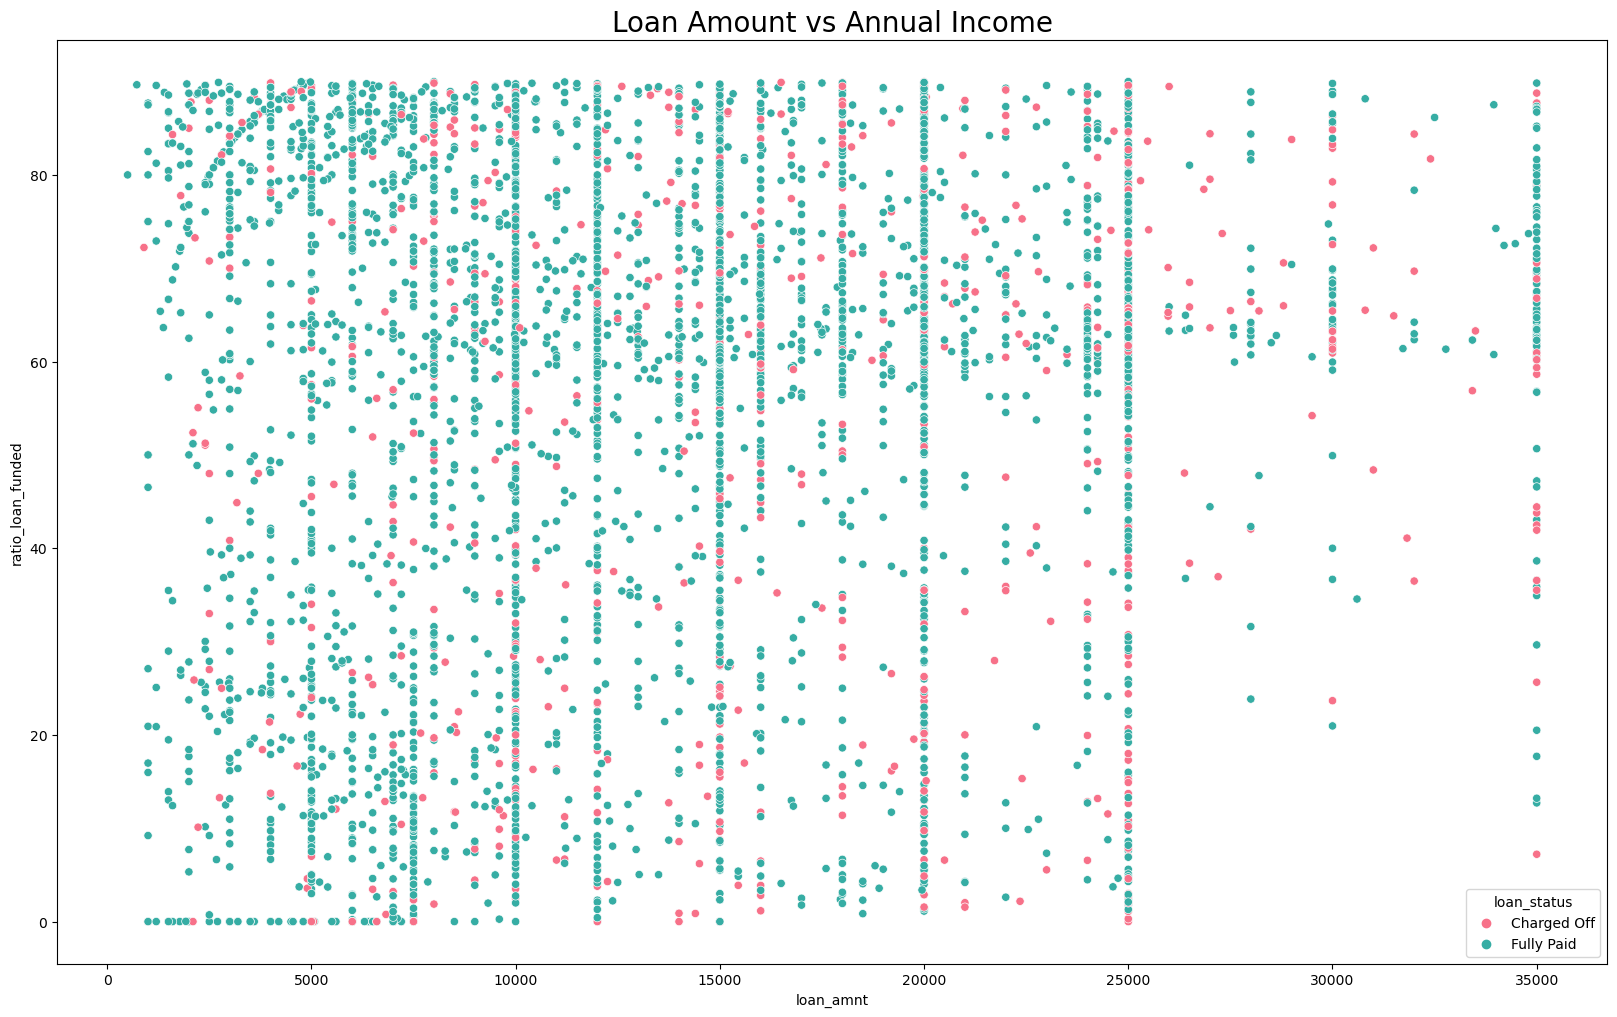

In [112]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='loan_amnt', y='ratio_loan_funded', data=lc_ratio , hue='loan_status', palette = "husl")
plt.title('Loan Amount vs Annual Income',fontsize="20")
plt.show()

Observation: Most of borrower have defaulted where ratio_loan_funded is less than 90%. Its risky for lending club to approve loan of these type of borrowers.

### Issue Year/Month Vs Funded Amount by Investor

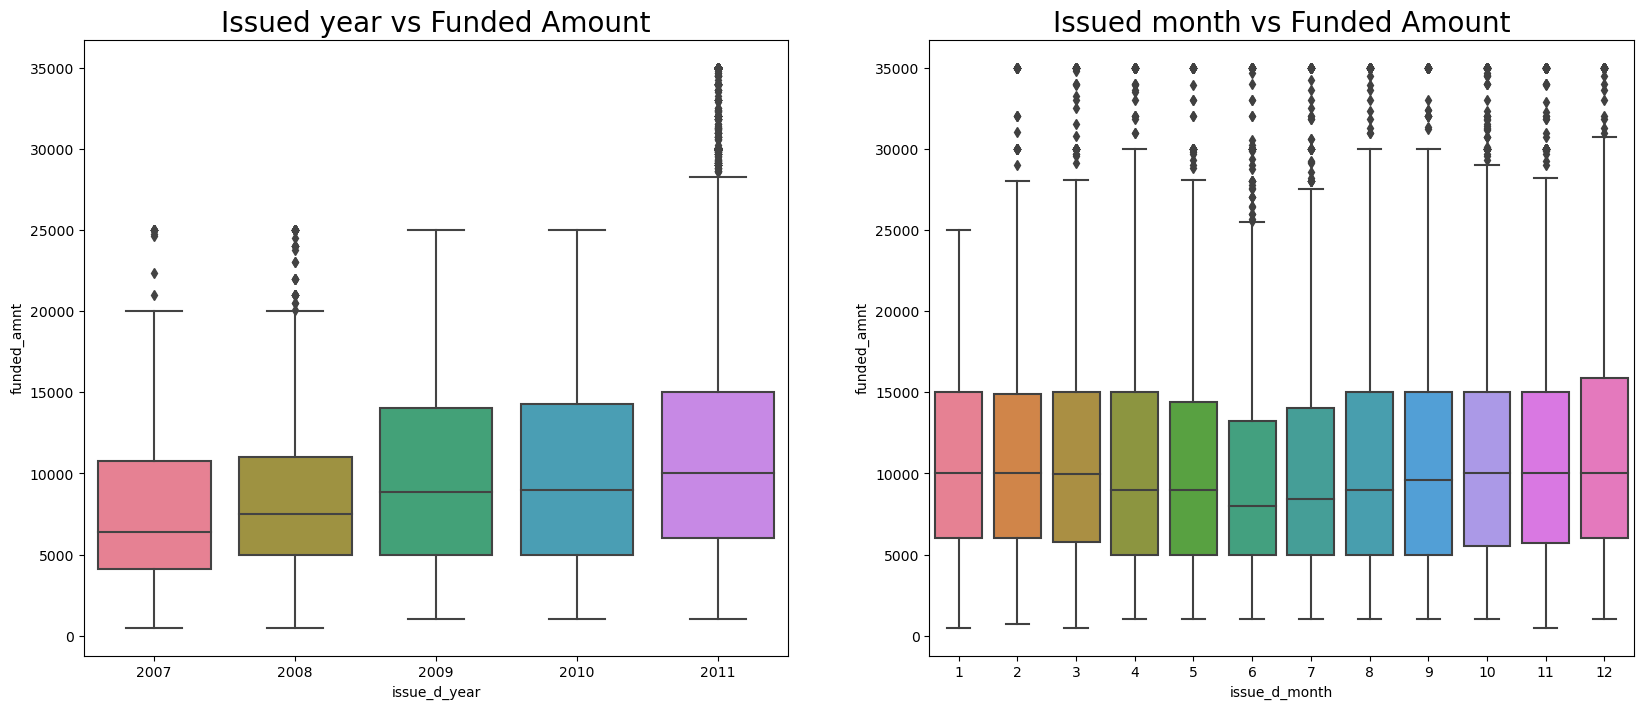

In [114]:
# This is comparison made with the new derived variable issue_d_year and issue_d_month with funded amount
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.boxplot(x=lc_df.issue_d_year, y=lc_df.funded_amnt, data=lc_df, palette = "husl")
plt.title('Issued year vs Funded Amount',fontsize="20")
plt.subplot(122)
sns.boxplot(x=lc_df.issue_d_month, y=lc_df.funded_amnt, data=lc_df,palette = "husl")
plt.title('Issued month vs Funded Amount',fontsize="20")
plt.show()

The loan amount is increasing each year but median does not change much. In 2008 and 2011 are having many outliers. The loan amount slighly increases in the month of December.

In [115]:
lc_corr= lc_df.corr()
lc_corr

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt           1.000000     0.981603         0.936871  0.299237   
funded_amnt         0.981603     1.000000         0.955300  0.302955   
funded_amnt_inv     0.936871     0.955300         1.000000  0.295697   
int_rate            0.299237     0.302955         0.295697  1.000000   
installment         0.931686     0.957721         0.904110  0.274791   
annual_inc          0.266282     0.261959         0.249320  0.046092   
dti                 0.061402     0.061251         0.070007  0.112188   
issue_d_month       0.052812     0.042576         0.069273  0.026176   
issue_d_year        0.115074     0.126093         0.259073  0.044083   
ratio_loan_funded  -0.104984    -0.034197         0.198279  0.022707   

                   installment  annual_inc       dti  issue_d_month  \
loan_amnt             0.931686    0.266282  0.061402       0.052812   
funded_amnt           0.957721    0.261959  0.061251       0.042576   
funded_amnt_inv       0.904110    0.249320  0.070007       0.069273   
int_rate              0.274791    0.046092  0.112188       0.026176   
installment           1.000000    0.264684  0.050727       0.029796   
annual_inc            0.264684    1.000000 -0.123582       0.009557   
dti                   0.050727   -0.123582  1.000000       0.012125   
issue_d_month         0.029796    0.009557  0.012125       1.000000   
issue_d_year          0.057550    0.012689  0.094332      -0.035307   
ratio_loan_funded    -0.046200   -0.028274  0.033385       0.052218   

                   issue_d_year  ratio_loan_funded  
loan_amnt              0.115074          -0.104984  
funded_amnt            0.126093          -0.034197  
funded_amnt_inv        0.259073           0.198279  
int_rate               0.044083           0.022707  
installment            0.057550          -0.046200  
annual_inc             0.012689          -0.028274  
dti                    0.094332           0.033385  
issue_d_month         -0.035307           0.052218  
issue_d_year           1.000000           0.556976  
ratio_loan_funded      0.556976           1.000000

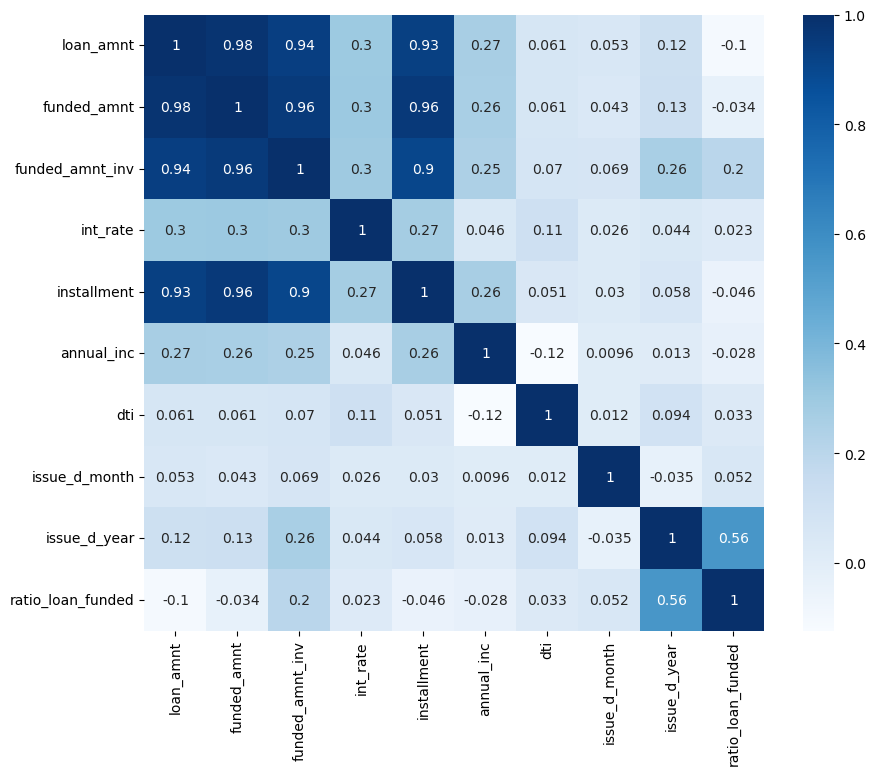

In [126]:
# Visual representation of the correlation in the dataset
plt.figure(figsize =(10,8))
sns.heatmap(lc_corr,annot=True,cmap = 'Blues')
plt.show()

### Conclusion:
##### 1. Lending club should reduce the higher interest rate loans with higher tenure (60 months) , these loans are more prone to default.
##### 2. Small Business loans are more defaulted, So these loan should be reduced.
##### 3. Grade are good metric for detecting defaulters. Loan applicants categorised under lower grades like G, F and E should be examined more stringently. 
##### 4. Borrowers with mortgage home ownership are taking higher loan, and defaulted, these loan should be reduced.
##### 5. If Ratio of loan amount and funded amount is lesser than 90%, we see most of borrower tend to defaulted. Its risky for lending club to approve loan for these borrowers.